# FAKE NEWS DETECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Reading Datasets

In [ ]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

# Data cleaning and preperation

In [ ]:
# Adding flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenating dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffling the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,WATCH: MSNBC Panel Explains Terrifying Reason...,"Since taking office, Donald Trump has surround...",News,"March 11, 2017",fake
1,Hillary Responds To Trump On Twitter And HILA...,To say Hillary Clinton wiped the floor with Do...,News,"June 3, 2016",fake
2,Trump's tougher stance could backfire by boost...,ANKARA/LONDON (Reuters) - Iran s elite Islamic...,worldnews,"October 23, 2017",true
3,Russia and North Korea to discuss nuclear cris...,MOSCOW/WASHINGTON (Reuters) - Russian and Nort...,worldnews,"September 28, 2017",true
4,U.S. tax reform debate moves away from Ryan bl...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,"April 12, 2017",true


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,WATCH: MSNBC Panel Explains Terrifying Reason...,"Since taking office, Donald Trump has surround...",News,fake
1,Hillary Responds To Trump On Twitter And HILA...,To say Hillary Clinton wiped the floor with Do...,News,fake
2,Trump's tougher stance could backfire by boost...,ANKARA/LONDON (Reuters) - Iran s elite Islamic...,worldnews,true
3,Russia and North Korea to discuss nuclear cris...,MOSCOW/WASHINGTON (Reuters) - Russian and Nort...,worldnews,true
4,U.S. tax reform debate moves away from Ryan bl...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,true


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"Since taking office, Donald Trump has surround...",News,fake
1,To say Hillary Clinton wiped the floor with Do...,News,fake
2,ANKARA/LONDON (Reuters) - Iran s elite Islamic...,worldnews,true
3,MOSCOW/WASHINGTON (Reuters) - Russian and Nort...,worldnews,true
4,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,true


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"since taking office, donald trump has surround...",News,fake
1,to say hillary clinton wiped the floor with do...,News,fake
2,ankara/london (reuters) - iran s elite islamic...,worldnews,true
3,moscow/washington (reuters) - russian and nort...,worldnews,true
4,washington (reuters) - u.s. house speaker paul...,politicsNews,true


In [ ]:
# Removing punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,since taking office donald trump has surrounde...,News,fake
1,to say hillary clinton wiped the floor with do...,News,fake
2,ankaralondon reuters iran s elite islamic rev...,worldnews,true
3,moscowwashington reuters russian and north ko...,worldnews,true
4,washington reuters us house speaker paul ryan...,politicsNews,true


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,since taking office donald trump surrounded wh...,News,fake
1,say hillary clinton wiped floor donald trump f...,News,fake
2,ankaralondon reuters iran elite islamic revolu...,worldnews,true
3,moscowwashington reuters russian north korean ...,worldnews,true
4,washington reuters us house speaker paul ryan’...,politicsNews,true


# Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


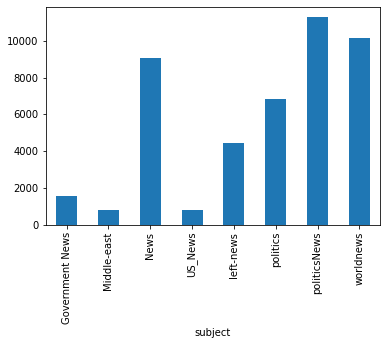

In [ ]:
# Articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


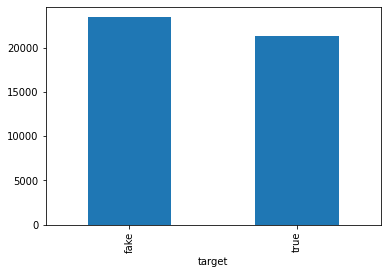

In [ ]:
#  fake vs real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

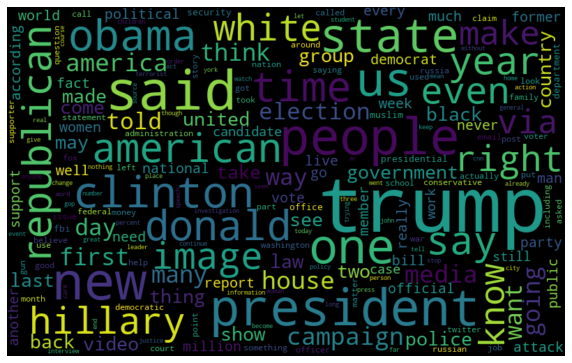

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

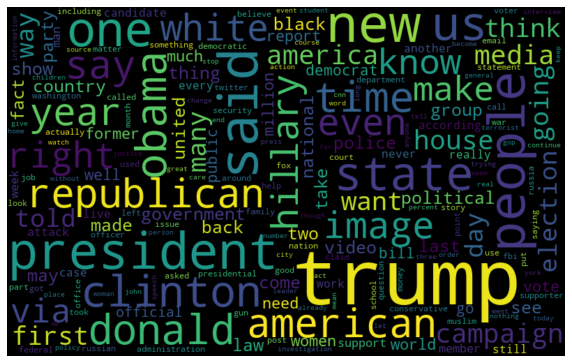

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter    
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

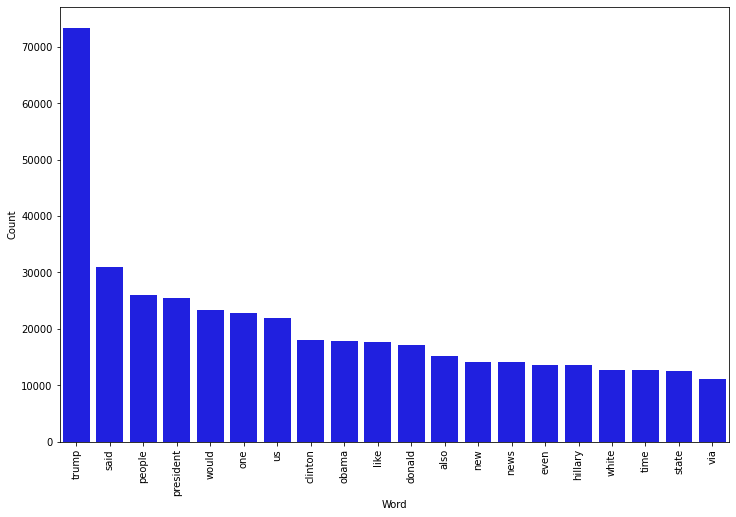

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

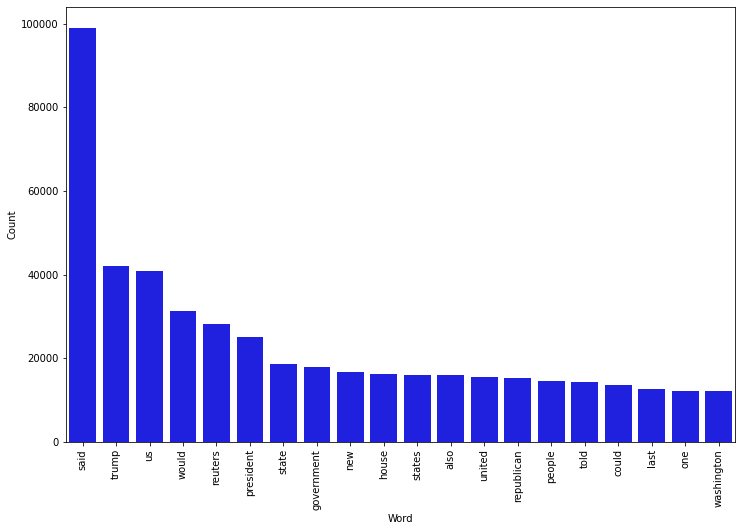

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling

In [ ]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# preparing data

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.75%


Confusion matrix, without normalization


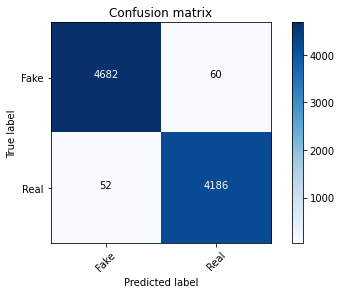

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.63%


Confusion matrix, without normalization


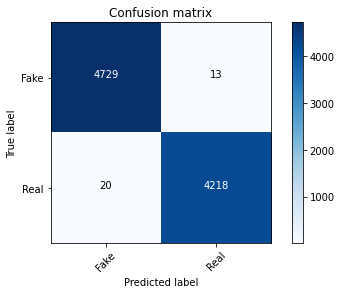

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.08%


Confusion matrix, without normalization


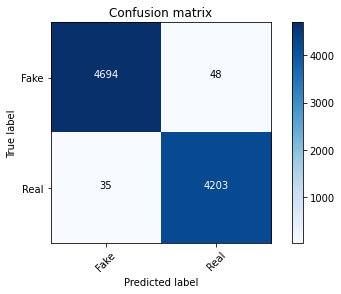

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D

In [ ]:
import gensim

In [ ]:
y=data['target'].values

In [ ]:
X=[d.split() for d in data['text'].tolist()]

In [ ]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,size=DIM,window=10,min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

245233

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'said': 1,
 'trump': 2,
 'us': 3,
 'would': 4,
 'president': 5,
 'people': 6,
 'one': 7,
 'also': 8,
 'state': 9,
 'new': 10,
 'reuters': 11,
 'donald': 12,
 'house': 13,
 'government': 14,
 'clinton': 15,
 'states': 16,
 'obama': 17,
 'republican': 18,
 'could': 19,
 'united': 20,
 'told': 21,
 'white': 22,
 'like': 23,
 'campaign': 24,
 'last': 25,
 'news': 26,
 'two': 27,
 'election': 28,
 'time': 29,
 'party': 30,
 'first': 31,
 'former': 32,
 'washington': 33,
 'even': 34,
 'year': 35,
 'country': 36,
 'many': 37,
 'hillary': 38,
 'years': 39,
 'security': 40,
 'may': 41,
 'media': 42,
 'national': 43,
 'political': 44,
 'say': 45,
 'made': 46,
 'get': 47,
 'police': 48,
 'law': 49,
 'make': 50,
 'since': 51,
 'american': 52,
 'percent': 53,
 'going': 54,
 'court': 55,
 'presidential': 56,
 'republicans': 57,
 'back': 58,
 'democratic': 59,
 'support': 60,
 'administration': 61,
 'bill': 62,
 'including': 63,
 'week': 64,
 'senate': 65,
 'north': 66,
 'know': 67,
 'according': 68

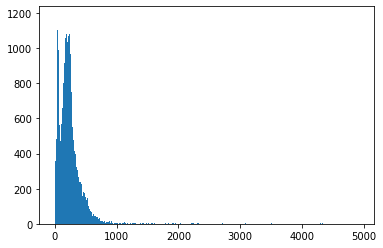

In [ ]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [ ]:
X=pad_sequences(X,maxlen=1000)

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix= np.zeros((vocab_size,DIM))
  for word, i in vocab.items():
     weight_matrix[i]=model.wv[word]
  return weight_matrix

In [ ]:
embedding_vectors= get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(245234, 100)

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=1000,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         24523400  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 24,640,777
Trainable params: 117,377
Non-trainable params: 24,523,400
_________________________________________________________________


In [ ]:
for i in range(0,len(y)):
  if(y[i]=="true"):
    y[i]=1
  else:
    y[i]=0

In [ ]:
y = np.asarray(y).astype('int32')

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 763s 1s/step - loss: 0.0043 - val_loss: 7.8872e-06
Epoch 2/6
737/737 [==============================] - 766s 1s/step - loss: 4.7525e-06 - val_loss: 2.8313e-06
Epoch 3/6
737/737 [==============================] - 767s 1s/step - loss: 2.0863e-06 - val_loss: 1.5011e-06
Epoch 4/6
737/737 [==============================] - 770s 1s/step - loss: 1.1952e-06 - val_loss: 9.2634e-07
Epoch 5/6
737/737 [==============================] - 761s 1s/step - loss: 7.6583e-07 - val_loss: 6.1615e-07
Epoch 6/6
737/737 [==============================] - 760s 1s/step - loss: 5.1964e-07 - val_loss: 4.2695e-07


In [ ]:
y_pred=(model.predict(X_test)>=0.5).astype(int)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11225

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

